# Exercise 4 

## 4.a Plot the data

In [24]:
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

import pandas as pd

from sklearn import linear_model

# for creating a responsive plot
%matplotlib inline

In [25]:
# Load the data
Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

# See the results
np.concatenate((X,y), axis=1)[:5]

array([[0.        , 2.00195711],
       [0.1       , 2.01918334],
       [0.2       , 2.04400279],
       [0.3       , 2.06714191],
       [0.4       , 2.07310931]])

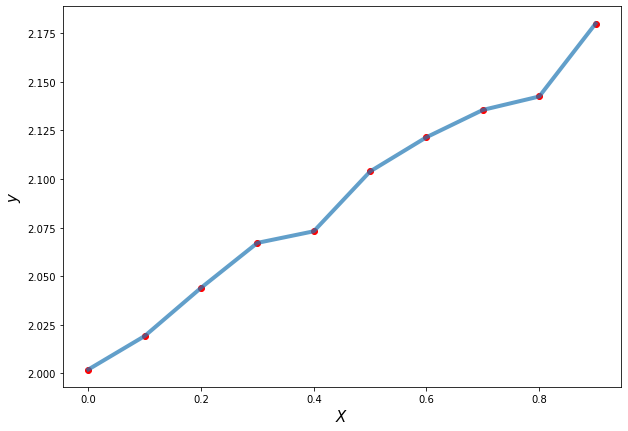

In [26]:
# plot the data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(X,y,c='red',marker='o')
ax.plot(X,y,  linewidth=4, alpha=0.7)
ax.set_xlabel('$X$', fontsize=15)
_ = ax.set_ylabel('$y$', fontsize=15)


In [27]:
# function to return 8th degree polynomial of given input
def calculate_polyn(x):
    x_polyn = x
    for i in range(2,9):
        x_polyn = np.append(x_polyn, np.power(x,i))
    return x_polyn.reshape(1,-1)

# create the X matrix
X_p = np.array(calculate_polyn(X[0]))
for i in X[1:,0:]:
    X_p = np.concatenate((X_p, np.array(calculate_polyn(i))))
X_p =  np.concatenate((np.ones((10, 1)), X_p), axis=1)

print("8th degree polynomial X matrix:\n")
print(X_p[:2])

8th degree polynomial X matrix:

[[1.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08]]


## 4.b

Fit a 8th degree polynomial on the data using the LS estimator and plot the results (data points and the curve resulting from the fit). Output also the estimates of the parameters of the polynomial.

In [28]:
# Calculate \theta LS
Xx_inv = np.linalg.inv(X_p.T.dot(X_p)) 

Xy = X_p.T.dot(y)

# Finally
theta_ls = Xx_inv.dot(Xy)

# data points:
y_hat = theta_ls.T.dot(X_p.T)

In [29]:
# Source https://stackoverflow.com/questions/37352098/plotting-a-polynomial-using-matplotlib-and-coeffiecients
def polynomial_coefficients(xs, coeffs):
    """ Returns a list of function outputs (`ys`) for a polynomial with the given coefficients and
    a list of input values (`xs`).

    The coefficients must go in order from a0 to an, and all must be included, even if the value is 0.
    """
    order = len(coeffs)

    ys = np.zeros(len(xs))  # Initialise an array of zeros of the required length.
    for i in range(order):
        ys += coeffs[i] * xs ** i
    return ys

The estimates are:
[ 2.00200245e+00  2.59357661e-01 -3.83236599e+00  4.94205475e+01
 -2.62207916e+02  6.98307312e+02 -9.86594788e+02  7.06146301e+02
 -2.01451599e+02]


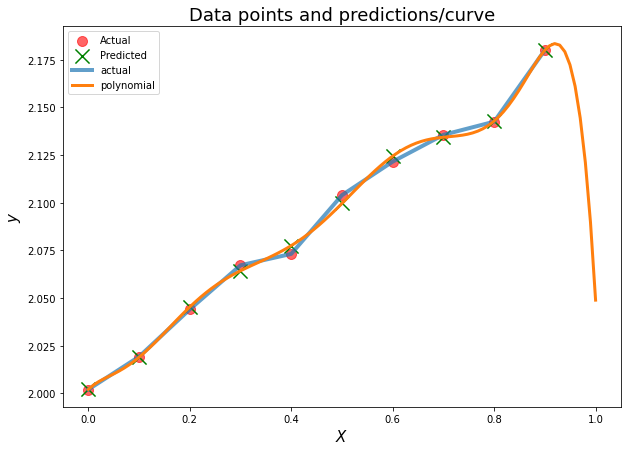

In [30]:
# plot the data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

# Plot points
ax.scatter(X,y,c='red',marker='o', label = 'Actual', s=100, alpha=0.6)
ax.scatter(X,y_hat,c='green',marker='x', label = 'Predicted', s=200)

# Plot actual line
ax.plot(X,y,  linewidth=4, alpha=0.7, label='actual')

# plot polynomial
x_points = np.linspace(0, 1, 100)
ax.plot(x_points, polynomial_coefficients(x_points, theta_ls), linewidth=3, label='polynomial')

ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)

ax.set_title('Data points and predictions/curve', fontsize=18)

_ = ax.legend()

print('The estimates are:')
print(theta_ls.flatten())

## 4.c

Fit a 8th degree polynomial on the data using the ridge regression estimator and plot the results (data points and the curve resulting from the fit). Output also the estimates of the parameters of the polynomial. Experiment with various values of $\lambda$.

We will first calculate the Ridge regression Estimators for small values of $\lambda$, since these give better results:

The estimates for lambda = 1e-05 are:
[ 2.00221134e+00  2.59453207e-01 -3.83230495e+00  4.94205933e+01
 -2.62207916e+02  6.98307312e+02 -9.86594727e+02  7.06146362e+02
 -2.01451584e+02]

The estimates for lambda = 0.0001 are:
[ 2.00409134e+00  2.60313243e-01 -3.83175659e+00  4.94209824e+01
 -2.62207611e+02  6.98307556e+02 -9.86594543e+02  7.06146484e+02
 -2.01451447e+02]

The estimates for lambda = 0.001 are:
[ 2.02289141e+00  2.68913567e-01 -3.82627296e+00  4.94248962e+01
 -2.62204620e+02  6.98309937e+02 -9.86592590e+02  7.06148071e+02
 -2.01450134e+02]



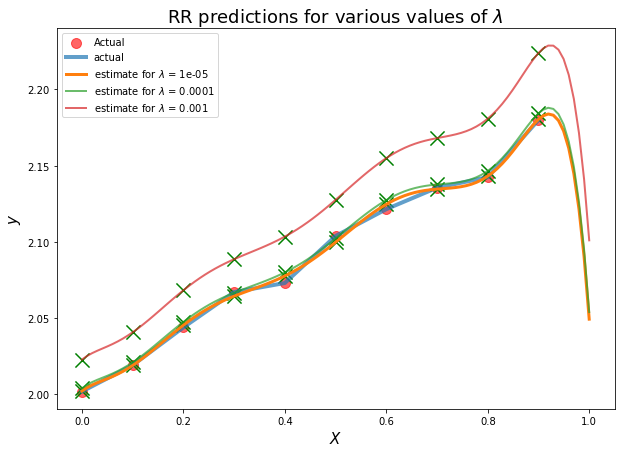

In [36]:
def calculate_rr(X_p, lam, y):
    # Calculate \theta LS
    Xx_inv = np.linalg.inv(X_p.T.dot(X_p)) + lam * np.identity(9)

    Xy = X_p.T.dot(y)

    # Finally
    theta_rr = Xx_inv.dot(Xy)

    # data points:
    y_hat = theta_rr.T.dot(X_p.T)

    return theta_rr, y_hat


def plot_actual_vs_predicted_RR(X, X_p, y, l):
    # plot the data
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)

    # Plot points
    ax.scatter(X,y,c='red',marker='o', label = 'Actual', s=100, alpha=0.6)


    # Plot actual line
    ax.plot(X,y,  linewidth=4, alpha=0.7, label='actual')

    ax.set_xlabel('$X$', fontsize=15)
    ax.set_ylabel('$y$', fontsize=15)


    for it, ld in enumerate(l):
        theta_rr, y_hat = calculate_rr(X_p, ld, y)

        ax.scatter(X,y_hat,c='green',marker='x', s=200)

        # plot polynomial
        x_points = np.linspace(0, 1, 100)
        if it==0:
            ax.plot(x_points, polynomial_coefficients(x_points, theta_rr), linewidth=3, label=f'estimate for $\lambda$ = {ld}')
        else:  
            ax.plot(x_points, polynomial_coefficients(x_points, theta_rr), linewidth=2, label=f'estimate for $\lambda$ = {ld}', alpha=0.7)
        print(f'The estimates for lambda = {ld} are:')
        print(theta_rr.flatten())
        print()
    ax.set_title('RR predictions for various values of $\lambda$', fontsize=18)
    _ = ax.legend()


l = [10**i for i in range(-5,-2)]
plot_actual_vs_predicted_RR(X, X_p, y, l)

For large values of $\lambda$ we have:

The estimates for lambda = 0.01 are:
[ 2.21089207e+00  3.54916871e-01 -3.77143669e+00  4.94640121e+01
 -2.62174927e+02  6.98333313e+02 -9.86573608e+02  7.06163818e+02
 -2.01436935e+02]

The estimates for lambda = 0.1 are:
[   4.09089866    1.2149497    -3.22307777   49.85523224 -261.87789917
  698.56787109 -986.38336182  706.32110596 -201.30496216]

The estimates for lambda = 1 are:
[  22.89096461    9.81527808    2.26051807   53.76735687 -258.90756226
  700.91320801 -984.48126221  707.8939209  -199.98524475]

The estimates for lambda = 10 are:
[ 210.89162412   95.81856176   57.09647274   92.88865662 -229.20419312
  724.36639404 -965.46038818  723.62225342 -186.78813171]



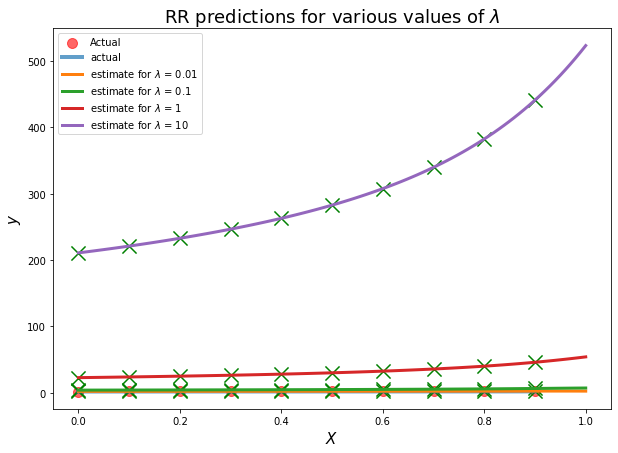

In [32]:
l = [10**i for i in range(-2,2,1)]
plot_actual_vs_predicted_RR(X, X_p, y, l)

## 4.d

Fit a 8th degree polynomial on the data using the LASSO estimator and plot the results (data points and the curve resulting from the fit). Output also the estimates of the parameters of the polynomial. Experiment with various values of $\lambda$.

C:\Users\jojoshulk\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3395959829584926e-05, tolerance: 2.980546358500307e-06
  positive)


The estimates for lambda = 1e-06 are:
[ 2.00198987  0.17547491  0.11999218 -0.06109269 -0.12454477 -0.08486763
 -0.01077142  0.03825068  0.19828017]

The estimates for lambda = 0.0001 are:
[2.00441216 0.18774234 0.         0.         0.         0.
 0.         0.         0.        ]

The estimates for lambda = 0.01 are:
[2.05841216 0.06774234 0.         0.         0.         0.
 0.         0.         0.        ]



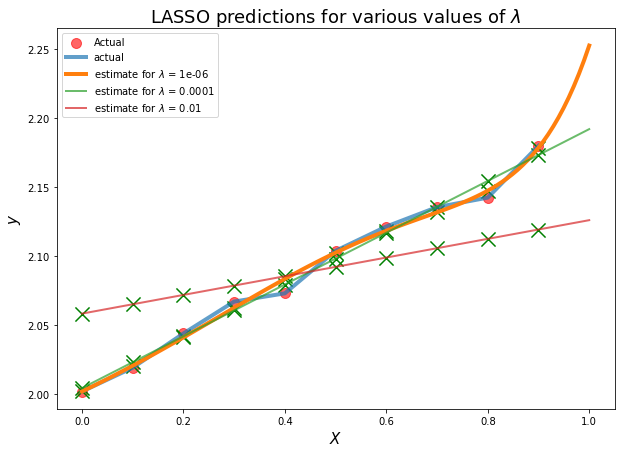

In [33]:
def plot_actual_vs_predicted_LASSO(X, X_p, y, l):
    # plot the data
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)

    # Plot points
    ax.scatter(X,y,c='red',marker='o', label = 'Actual', s=100, alpha=0.6)


    # Plot actual line
    ax.plot(X,y,  linewidth=4, alpha=0.7, label='actual')

    ax.set_xlabel('$X$', fontsize=15)
    ax.set_ylabel('$y$', fontsize=15)


    for it, ld in enumerate(l):
        clf = linear_model.Lasso(ld)
        clf.fit(X_p, y)

        theta_lasso = np.append(clf.intercept_,clf.coef_)
        ax.scatter(X,clf.predict(X_p),c='green',marker='x', s=200)

        # plot polynomial
        x_points = np.linspace(0, 1, 100)
        if it == 0:
            ax.plot(x_points, polynomial_coefficients(x_points, theta_lasso), linewidth=4, label=f'estimate for $\lambda$ = {ld}')
        else:
            ax.plot(x_points, polynomial_coefficients(x_points, theta_lasso), linewidth=2, label=f'estimate for $\lambda$ = {ld}', alpha=0.7)
        print(f'The estimates for lambda = {ld} are:')
        print(theta_lasso.flatten())
        print()
    ax.set_title('LASSO predictions for various values of $\lambda$', fontsize=18)
    _ = ax.legend()

l = [10**i for i in range(-6,-1,2)]
plot_actual_vs_predicted_LASSO(X, X_p[:,1:], y, l)

## 4.e 

Discuss briefly on the results.

This excercise demonstrated the performance of various estimators on a given dataset. We approched he problem in three ways, with the following estimators:
* LS estimator
* Ridge Regression estimator
* Lasso estimator

Initially we saw that the LS estimator is passing through all data, but it seems that after that it doesn't follow the "trend" of the data (which can be though of as a line). Then using the Ridge Regression, we see that for small values of $\lambda$ the performance of the performance is similar, but as $\lambda$ increases the predicted data points are moving away from the true values.
Finally, using Lasso Regression, we can see that for small values of $\lambda$ the predictions are the best, but as lambda increases the preictions diverge from the actual values, and the predictions, then follow a line.

# Exercise 5 

## 5.i 

Determine the range of values of $\lambda$ where the MSE is smaller than that of the unbiased LS estimator,

In [239]:
def generate_data(state):

    r = np.random.RandomState(state)
    # Construct X matrix [1, x1, x2, x1*x2]
    X = r.uniform(low=0,high=10,size=(30,1))

    # define theta
    theta = 2

    # define normal error
    n = r.normal(0,np.sqrt(64),len(X))

    # Define y using only x1, x2
    y = theta * (X.T) + n

    #prin X and y
    return(np.concatenate((X, y.reshape(-1,1), n.reshape(-1,1)), axis=1))

def yield_index(ds, num):
    """
    Function to return a virtual dataset from a np array with 30 data points per dataset
    Input:  an array containing all dataset, in order
            the requested dataset point (ex. in order to fetch dataset 30 num should be 30)
    Output: the range in which the specific dataset can be found
    """
    return ds[num*30-30: num*30]

# Geneerate 50 datasets
data = np.empty((1,3))
for i in range(50):
    data = np.concatenate((data, generate_data(i)))
data = data[1:]

X_all = data[:,0]
y_all = data[:,1]
data[:,:5]

array([[ 5.48813504, 17.89175967,  6.91548959],
       [ 7.15189366,  8.36646716, -5.93732016],
       [ 6.02763376, 30.21330451, 18.15803699],
       ...,
       [ 2.51929002,  7.97437456,  2.93579451],
       [ 3.02920439, 15.41652257,  9.35811379],
       [ 0.76047628,  7.45203207,  5.93107951]])

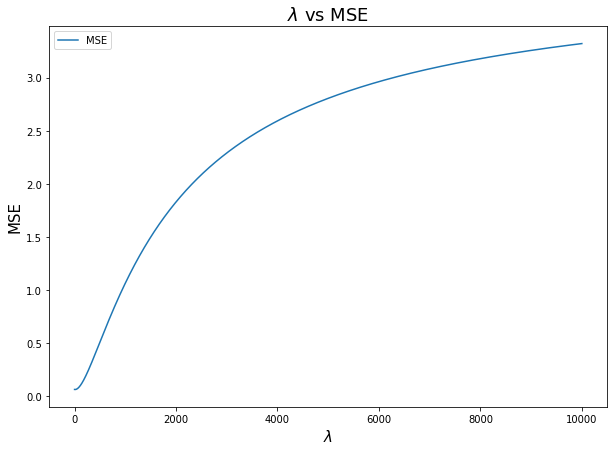

In [240]:
# initialize values
MSE = []
min, pos = 1, 0
min_range = []
lambda_range = np.arange(0, 10000, 0.1)
# start iteration for various values of lambda
for j, ld in enumerate(lambda_range):

    # Calculate theta
    theta = []
    for i in range(50):
        # Fetch the dataset located in position i+1 of the X_all table
        X = yield_index(X_all, i+1)
        y = yield_index(y_all, i+1)

        # Calculate scalar tables
        XX = X.dot(X.T) + ld 
        Xy = X.dot(y.T)

        # Append Theta
        theta.append(Xy/(XX))
        
    # append MSE 
    cur_MSE = np.power((np.full((50), 2) - theta),2).mean()
    MSE.append(cur_MSE)

    # keep track of the index with the lowest MSE
    if cur_MSE < min:
        min, pos = cur_MSE, j
        

    if j == 0:
        MSE_LS = cur_MSE
    elif cur_MSE <= MSE_LS:
        min_range.append(j)

# Plot the results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(lambda_range, MSE, label='MSE')   

ax.set_xlabel('$\lambda$', fontsize=15)
ax.set_ylabel('MSE', fontsize=15)

ax.set_title('$\lambda$ vs MSE', fontsize=18)

_ = ax.legend()

* Let's zoom in the data to get a better view

Range where the RR MSE is smaller than that the the LS MSE: 0.10 <= λ <= 21.70


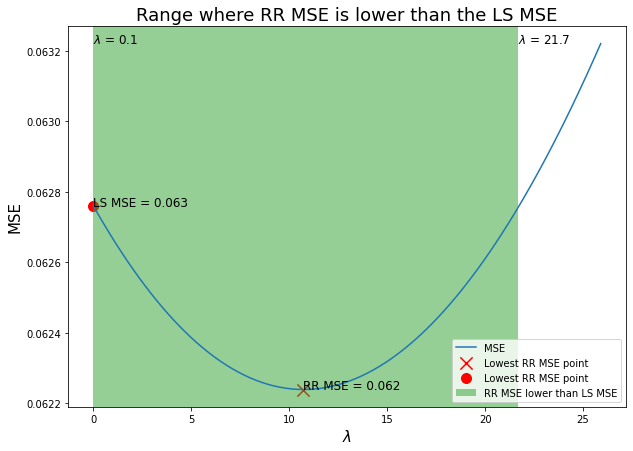

In [241]:
plot_range = int(min_range[-1]*1.2)
lambda_range_zoom, MSE_zoom = lambda_range[:plot_range], MSE[:plot_range]

print(f"Range where the RR MSE is smaller than that the the LS MSE: {lambda_range_zoom[min_range[0]]:.2f} <= λ <= {lambda_range_zoom[min_range[-1]]:.2f}")

# Plot the results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

ax.plot(lambda_range_zoom, MSE_zoom, label='MSE')   

ax.scatter(lambda_range_zoom[pos], MSE_zoom[pos], c='r', label='Lowest RR MSE point', marker='x', s=150)
ax.annotate(f"RR MSE = {MSE_zoom[pos]:.3f}", xy=(lambda_range_zoom[pos], MSE_zoom[pos]), fontsize=12)

ax.scatter(0, MSE_zoom[0], c='r', label='Lowest RR MSE point', marker='o', s=100)
ax.annotate(f"LS MSE = {MSE_zoom[0]:.3f}", xy=(0,MSE_zoom[0]), fontsize=12)

ax.axvspan(0, lambda_range_zoom[min_range[-1]], facecolor='#2ca02c', alpha = 0.5, label='RR MSE lower than LS MSE')
ax.annotate(f"$\lambda$ = {lambda_range_zoom[min_range[0]]:.1f}", xy=(0,MSE_zoom[-1]), fontsize=12)
ax.annotate(f"$\lambda$ = {lambda_range_zoom[min_range[-1]]:.1f}", xy=(lambda_range_zoom[min_range[-1]],MSE_zoom[-1]), fontsize=12)

ax.set_xlabel('$\lambda$', fontsize=15)
ax.set_ylabel('MSE', fontsize=15)

ax.set_title('Range where RR MSE is lower than the LS MSE', fontsize=18)

_ = ax.legend(loc='lower right')

## 5.ii

Comment on the results.

The above examples captures the essense of the theory shown so far. Knowing that the LS estimator is a MVU estimator, we tried various values of lambda and plotted the change in the RR MSE. As expected, there are $\lambda$ s that have an MSE lower than the MVU. For large values of $\lambda$ tough the MSE is getting close to 1. 
